In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data set.
<a id='h1_load_data'></a>

In [2]:
retail_raw_df = pd.read_csv(os.path.join('..', 'data', 'retail_raw.csv'))
#retail_raw_df = pd.read_csv(os.path.join('data', 'online_retail.csv'))
# https://www.kaggle.com/mashlyn/online-retail-ii-uci.

In [3]:
retail_raw_df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
468559,533547,21136,PAINTED METAL PEARS ASSORTED,8,2010-11-17 16:48:00,1.69,16409.0,United Kingdom
770484,558568,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2011-06-30 14:37:00,0.65,16316.0,United Kingdom
594349,541879,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1,2011-01-24 10:31:00,7.46,NaN,United Kingdom
666935,548514,22433,WATERING CAN GREEN DINOSAUR,1,2011-03-31 16:03:00,4.13,NaN,United Kingdom
247109,513309,21777,RECIPE BOX WITH METAL HEART,2,2010-06-23 14:59:00,7.95,14623.0,United Kingdom
562344,539453,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,1,2010-12-17 17:08:00,5.91,NaN,United Kingdom
531514,536876,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-03 11:36:00,7.62,NaN,United Kingdom
44112,493260,20990,SPRING FLOWER CHOPSTICKS SET/5,2,2009-12-22 14:31:00,4.30,NaN,United Kingdom
1060811,581215,22809,SET OF 6 T-LIGHTS SANTA,36,2011-12-08 09:05:00,2.55,13408.0,United Kingdom
611291,543530,21167,WHITE SAGE INCENSE,20,2011-02-09 12:46:00,0.42,NaN,United Kingdom


In [4]:
retail_raw_df.columns = ['invoice_id', 'stock_code', 'description', 'quantity', 'invoice_date', 'price', 'customer_id', 'country']

In [5]:
retail_raw_df['invoice_date_dt'] = pd.to_datetime(retail_raw_df['invoice_date'])

In [6]:
retail_raw_df['order_value'] = retail_raw_df['price'] * retail_raw_df['quantity']

In [7]:
# retail_agg_df = retail_raw_df.groupby([
#     'Invoice',
#     pd.Grouper(key='invoice_date_dt', freq='W-MON')]
# )['order_value'] \
#     .sum() \
#     .reset_index() \
#     .sort_values('invoice_date_dt')

In [32]:
#retail_raw_df.loc[retail_raw_df['order_value'] == 0].sample(30)
len(retail_raw_df.loc[retail_raw_df['order_value'] == 0]) / len(retail_raw_df)

0.005810538228975679

In [8]:
retail_agg_df = retail_raw_df.groupby(['invoice_id', 'invoice_date_dt', 'country'])['order_value'] \
    .sum() \
    .reset_index() \
    .sort_values('invoice_id')

In [9]:
retail_agg_df.shape

(53711, 4)

In [10]:
retail_agg_df.sample(10)

,invoice_id,invoice_date_dt,country,order_value
50190,C539866,2010-12-23 10:20:00,Germany,-56.95
20840,531170,2010-11-05 14:36:00,United Kingdom,0.00
5836,501104,2010-03-12 13:08:00,United Kingdom,146.40
44761,580317,2011-12-02 15:29:00,United Kingdom,584.52
40922,572565,2011-10-25 10:17:00,United Kingdom,573.45
22293,534172,2010-11-21 13:30:00,United Kingdom,1130.48
44110,578856,2011-11-27 11:18:00,United Kingdom,707.81
19886,529213,2010-10-27 10:32:00,United Kingdom,170.40
26845,544086,2011-02-15 16:49:00,United Kingdom,0.00
24347,538366,2010-12-12 10:47:00,United Kingdom,275.30


In [11]:
dt_min = min(pd.to_numeric(retail_agg_df['invoice_date_dt']))
dt_min

1259653500000000000

In [12]:
retail_agg_df['period_id'] = ['Q{}_{}'.format(str((dt.month - 1) // 3 + 1), dt.year) for dt in retail_agg_df['invoice_date_dt']]

In [13]:
retail_agg_df['period_id'] = pd.Categorical(values=retail_agg_df['period_id'], categories=['Q4_2009', 'Q1_2010', 'Q2_2010', 'Q3_2010', 'Q4_2010', 'Q1_2011', 'Q2_2011', 'Q3_2011', 'Q4_2011'], ordered=True)

In [14]:
retail_agg_df.dtypes

invoice_id                 object
invoice_date_dt    datetime64[ns]
country                    object
order_value               float64
period_id                category
dtype: object

In [ ]:
#retail_agg_df.sample(20)

In [ ]:
#retail_agg_df['week_id'] = pd.to_numeric(np.round((pd.to_numeric(retail_agg_df['invoice_date_dt']) - dt_min) / 1E9 / 60 / 60 / 24 / 7) + 1, downcast='integer')

In [ ]:
#retail_agg_df['week_id'].dtype

In [15]:
pd.options.display.max_rows = 100

In [16]:
#retail_agg_df.loc[retail_agg_df['Country'] == 'Sweden'].groupby([
retail_agg_df.groupby([
    'country',
    #'week_id'
    'period_id'
]).agg(
    sales=('order_value', 'sum'),
    n_invoices=('invoice_id', 'count')
)

sales  n_invoices
country     period_id                      
Australia   Q4_2009       50.25           5
            Q1_2010     1459.05           5
            Q2_2010     5132.93          14
            Q3_2010     1595.45           8
            Q4_2010    22819.22          20
...                         ...         ...
West Indies Q4_2010        0.00           0
            Q1_2011        0.00           0
            Q2_2011        0.00           0
            Q3_2011        0.00           0
            Q4_2011        0.00           0

[387 rows x 2 columns]

In [17]:
retail_agg_df.dtypes

invoice_id                 object
invoice_date_dt    datetime64[ns]
country                    object
order_value               float64
period_id                category
dtype: object

In [18]:
#?pd.DataFrame.agg

<AxesSubplot:xlabel='country'>

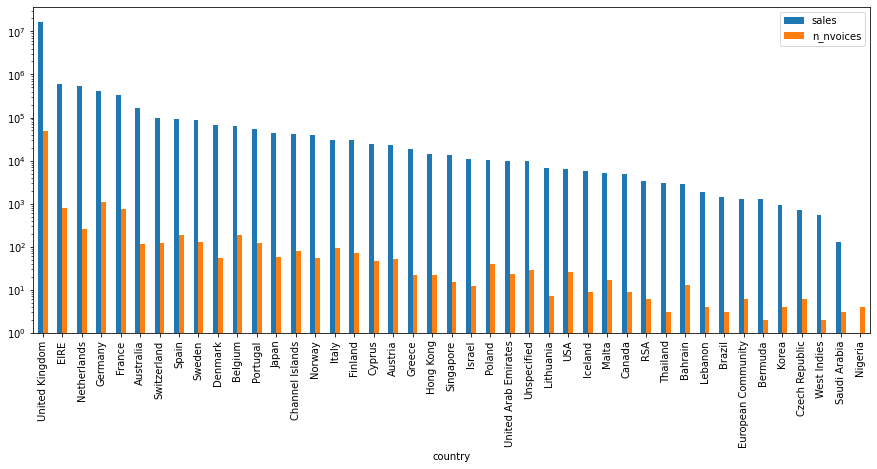

In [19]:
#retail_agg_df.loc[retail_agg_df['Country'] == 'Sweden'].groupby([
retail_agg_df.groupby([
    'country'
]).agg(
    sales=('order_value', 'sum'),
    n_nvoices=('invoice_id', 'count')
).sort_values(
    by='sales',
    ascending=False
).plot.bar(
    log=True,
    figsize=(15, 6)
)

In [20]:
retail_agg_df

,invoice_id,invoice_date_dt,country,order_value,period_id
0,489434,2009-12-01 07:45:00,United Kingdom,505.30,Q4_2009
1,489435,2009-12-01 07:46:00,United Kingdom,145.80,Q4_2009
2,489436,2009-12-01 09:06:00,United Kingdom,630.33,Q4_2009
3,489437,2009-12-01 09:08:00,United Kingdom,310.75,Q4_2009
4,489438,2009-12-01 09:24:00,United Kingdom,2286.24,Q4_2009
...,...,...,...,...,...
53706,C581484,2011-12-09 09:27:00,United Kingdom,-168469.60,Q4_2011
53707,C581490,2011-12-09 09:57:00,United Kingdom,-32.53,Q4_2011
53708,C581499,2011-12-09 10:28:00,United Kingdom,-224.69,Q4_2011
53709,C581568,2011-12-09 11:57:00,United Kingdom,-54.75,Q4_2011


In [21]:
#retail_agg_df.set_index('invoice_id')

In [22]:
# retail_agg_df = retail_agg_df.sort_values(by=['invoice_date_dt', 'country', 'invoice_id']).set_index('invoice_id')[['week_id', 'country', 'order_value']]
# retail_agg_df

In [23]:
retail_agg_df = retail_agg_df.sort_values(by=['invoice_date_dt', 'country', 'invoice_id']).set_index('invoice_id')[['invoice_date_dt', 'period_id', 'country', 'order_value']]
retail_agg_df

,invoice_date_dt,period_id,country,order_value
invoice_id,,,,
489434,2009-12-01 07:45:00,Q4_2009,United Kingdom,505.30
489435,2009-12-01 07:46:00,Q4_2009,United Kingdom,145.80
489436,2009-12-01 09:06:00,Q4_2009,United Kingdom,630.33
489437,2009-12-01 09:08:00,Q4_2009,United Kingdom,310.75
489438,2009-12-01 09:24:00,Q4_2009,United Kingdom,2286.24
...,...,...,...,...
581583,2011-12-09 12:23:00,Q4_2011,United Kingdom,124.60
581584,2011-12-09 12:25:00,Q4_2011,United Kingdom,140.64
581585,2011-12-09 12:31:00,Q4_2011,United Kingdom,329.05


In [24]:
retail_agg_df.to_csv(os.path.join('..', 'data', 'retail.csv'))

In [25]:
retail_agg_df.to_pickle(os.path.join('..', 'data', 'retail.pkl'))

In [ ]:
retail_agg_df.loc[
    (retail_agg_df['country'] == 'United Kingdom') & (retail_agg_df['week_id'] == 2)
]['order_value'].sum()

In [ ]:
retail_agg_df.loc[
    (retail_agg_df['country'] == 'United Kingdom') & (retail_agg_df['week_id'] == 1)
]['order_value'].sum()

In [ ]:
retail_raw_df.groupby(['invoice_date']).agg('count')['Invoice']

In [ ]:
date_start = ''

In [ ]:
retail_raw_df['Invoice'].str.lower().str.startswith('c') # Ignore cancelled orders.

In [ ]:
df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]